<a href="https://colab.research.google.com/github/AdityaChittora/Veritas-vigil/blob/main/Veritas_vigil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Fake.csv')

Saving Fake.csv to Fake.csv


Custom Tokenizer


In [4]:
# Custom tokenizer Developement
import re

contractions = {
    "isn't": "is not",
    "can't": "can not",
    "i'm": "i am",
    "you're": "you are",
    "it's": "it is",
    "won't": "will not",
    "didn't": "did not",
    "don't": "do not",
    "shouldn't": "should not",
    "aren't": "are not",
    "ain't": "am not"
}

def expand_contractions(text):
    for key, val in contractions.items():
        text = text.replace(key, val)
    return text

def normalize_repeats(word):
    return re.sub(r'(.)\1{2,}', lambda m: f"{m.group(1)} <REPEAT:{len(m.group(0)) - 1}>", word)

def custom_tokenizer(text):
    text = text.lower()

    text = expand_contractions(text)

    text = re.sub(r'[^a-z0-9\s<>:]', '', text)

    words = text.split()

    tokens = []
    for word in words:
        tokens.extend(normalize_repeats(word).split())

    return tokens

Pos tagger

In [5]:
# pos tagger
base_verbs = [
    "accept", "allow", "ask", "be", "become", "begin", "believe", "break", "bring", "build",
    "buy", "call", "can", "change", "choose", "clean", "come", "consider", "continue", "cook",
    "cut", "dance", "decide", "do", "draw", "drink", "drive", "eat", "explain", "fall", "feel",
    "find", "finish", "fly", "follow", "forget", "forgive", "get", "give", "go", "grow", "happen",
    "have", "hear", "help", "hold", "hope", "include", "invite", "jump", "keep", "know", "laugh",
    "learn", "leave", "like", "listen", "live", "look", "lose", "love", "make", "mean", "meet",
    "move", "need", "open", "pay", "play", "prefer", "prepare", "pull", "push", "put", "rain",
    "read", "remember", "run", "say", "see", "seem", "sell", "send", "show", "sing", "sit", "sleep",
    "smile", "speak", "spend", "stand", "start", "stay", "stop", "study", "succeed", "swim",
    "take", "talk", "teach", "tell", "think", "throw", "touch", "travel", "try", "turn", "understand",
    "use", "wait", "walk", "want", "watch", "win", "work", "write", "admit", "announce", "arrive",
    "attend", "attract", "avoid", "beat", "behave", "blame", "breathe", "burn", "calculate", "care",
    "cheat", "climb", "complain", "concentrate", "connect", "control", "convince", "correct", "cost",
    "cover", "create", "cross", "damage", "delay", "deliver", "depend", "describe", "destroy",
    "develop", "discover", "divide", "doubt", "dress", "educate", "employ", "encourage", "enjoy",
    "escape", "estimate", "examine", "exist", "expect", "experience", "express", "face", "feed",
    "fight", "fill", "fix", "fold", "forbid", "freeze", "gather", "guess", "handle", "hide", "identify",
    "imagine", "improve", "increase", "influence", "inform", "insist", "inspire", "introduce", "invite",
    "join", "joke", "kick", "kill", "knock", "laugh", "lead", "lend", "limit", "maintain", "manage",
    "mark", "marry", "mention", "miss", "notice", "obey", "observe", "occur", "offer", "organize",
    "pack", "participate", "pass", "perform", "persuade", "point", "postpone", "prefer", "promise",
    "protect", "prove", "react", "realize", "receive", "recommend", "reduce", "refuse", "regret",
    "relax", "remove", "repair", "replace", "reply", "report", "rescue", "respect", "respond",
    "return", "save", "scream", "search", "select", "separate", "shout", "sign", "solve", "sort",
    "succeed", "suggest", "support", "surprise", "survive", "suspect", "switch", "talk", "test",
    "train", "translate", "travel", "treat", "trust", "try", "understand", "update", "value",
    "visit", "wait", "warn", "wish", "wonder", "worry"
]

df['tokens'] = df['title'].apply(custom_tokenizer)

def mini_pos_tagger(token):
    token = token.lower()

    verb_list = ["is", "am", "are", "was", "were", "be", "been", "have", "has", "do", "did"]
    negations = ["no", "not", "never", "none"]

    if token in verb_list:
        return "VERB"
    elif token in negations:
        return "NEG"

    elif token.endswith("ing") or token.endswith("ed"):
        return "VERB"



    elif token.endswith( ("-able", "-ible","-al","-ant", "-ent","-ary","-ed","-en","-ful",
                          "-ic", "-ical","-ish","-ive","-less","-ous", "-eous", "-ious","-some",
                          "-y")):

        return "ADJ"


    elif token.endswith("s"):
        stem = token[:-1]
        if stem in base_verbs:
            return "VERB"
        elif len(token) > 3:
            return "NOUN"

    return "NOUN"
def tag_tokens(tokens):

    return [(token, mini_pos_tagger(token)) for token in tokens]


In [6]:
df['tokens'] = df['title'].apply(custom_tokenizer)
df['pos_tags'] = df['tokens'].apply(tag_tokens)


Lemmatizer

In [7]:
#Simple lemmatizer
def simple_lemmatizer(token, pos):
    token = token.lower()

    if pos == "VERB":
        if token.endswith("ing") and len(token) > 4:
            return token[:-3]
        elif token.endswith("ed") and len(token) > 3:
            return token[:-2]
        elif token.endswith("s") and len(token) > 3:
            return token[:-1]
    elif pos == "NOUN":
        if token.endswith("s") and len(token) > 3:
            return token[:-1]
    elif pos == "ADV":
        if token.endswith("ly") and len(token) > 3:
            return token[:-2]
    elif pos == "ADJ":
        if token.endswith("ful") or token.endswith("ous") or token.endswith("able"):
            return token[:-3]
    elif pos == "ADJ":
        if token.ensdwith("able")or token.endswith("ible")or token.endswith("ical")or token.endswith("less")or token.endswith("eous")or token.endswith("ious")or token.endswith("some"):
            return token[:-4]
    return token


In [8]:
#implimenting in dataframe
df['lemmatized_tokens'] = df['pos_tags'].apply(lambda tag_list: [simple_lemmatizer(w, p) for w, p in tag_list])

Feature Extraction and Classification

In [9]:
# Join tokens back into string for ML input
df['clean_text'] = df['lemmatized_tokens'].apply(lambda tokens: ' '.join(tokens))

# Import libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Extract features
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(df['clean_text'])

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['clean_text'])



# Target labels
y = df['subject']

# Train/test splits
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, y, test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train classifiers

# Naive Bayes on Bag-of-Words
nb_bow = MultinomialNB()
nb_bow.fit(X_train_bow, y_train_bow)
pred_nb_bow = nb_bow.predict(X_test_bow)

# SVM on TF-IDF
svm_tfidf = SVC(kernel='linear')
svm_tfidf.fit(X_train_tfidf, y_train_tfidf)
pred_svm_tfidf = svm_tfidf.predict(X_test_tfidf)

# Evaluate results
print("Naive Bayes (BoW)")
print(classification_report(y_test_bow, pred_nb_bow))

print("SVM (TF-IDF)")
print(classification_report(y_test_tfidf, pred_svm_tfidf))


Naive Bayes (BoW)
                 precision    recall  f1-score   support

Government News       0.14      0.06      0.08       316
    Middle-east       0.12      0.06      0.08       159
           News       0.78      0.87      0.82      1821
        US_News       0.07      0.03      0.04       160
      left-news       0.20      0.15      0.17       897
       politics       0.36      0.46      0.40      1344

       accuracy                           0.50      4697
      macro avg       0.28      0.27      0.27      4697
   weighted avg       0.46      0.50      0.48      4697

SVM (TF-IDF)
                 precision    recall  f1-score   support

Government News       0.18      0.03      0.05       316
    Middle-east       0.11      0.09      0.10       159
           News       0.80      0.86      0.83      1821
        US_News       0.06      0.04      0.05       160
      left-news       0.18      0.08      0.11       897
       politics       0.39      0.59      0.47      1

Visualization

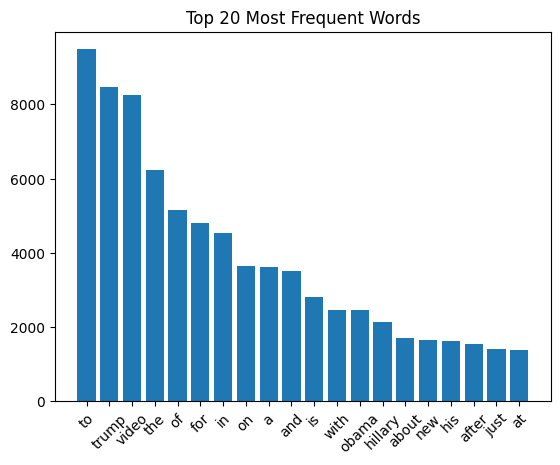

In [10]:
from collections import Counter
import matplotlib.pyplot as plt

word_counts = Counter(" ".join(df['clean_text']).split())
common_words = word_counts.most_common(20)

words, counts = zip(*common_words)
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words")
plt.show()


Word cloud

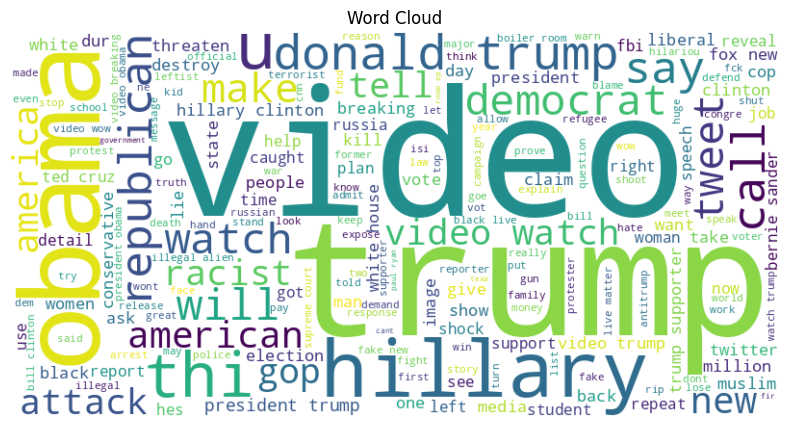

In [11]:
from wordcloud import WordCloud

text = " ".join(df['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud")
plt.show()


Confusion matrix - naive bayes

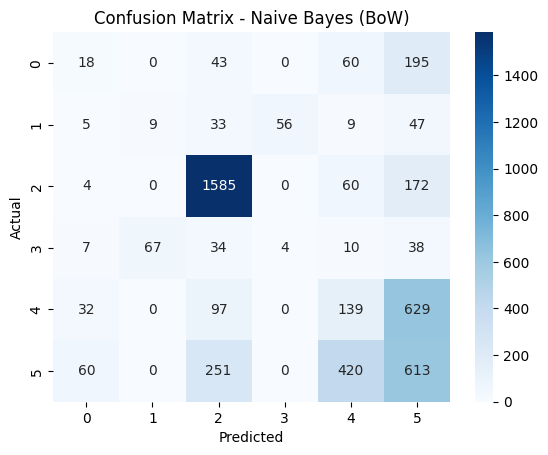

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_bow, pred_nb_bow)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes (BoW)")
plt.show()


confusion matrix (SVM)

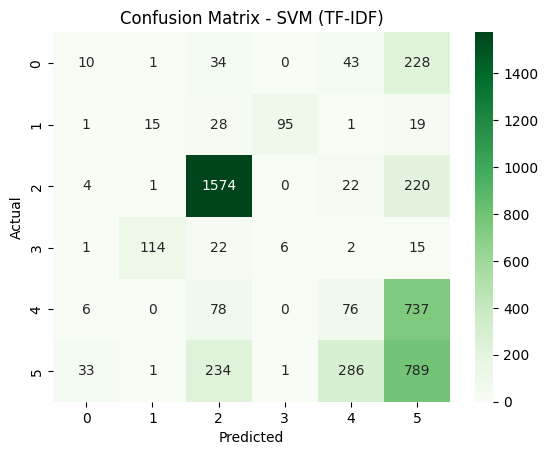

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_svm = confusion_matrix(y_test_tfidf, pred_svm_tfidf)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM (TF-IDF)")
plt.show()


In [14]:
print(set(y_test_bow))
print(y_test_bow.value_counts())


{'Government News', 'Middle-east', 'News', 'politics', 'US_News', 'left-news'}
subject
News               1821
politics           1344
left-news           897
Government News     316
US_News             160
Middle-east         159
Name: count, dtype: int64


In [15]:
df['target'] = df['subject'].apply(lambda x: 1 if x.strip().lower() == 'news' else 0)
y = df['target']


In [16]:
from sklearn.model_selection import train_test_split


X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, y, test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


ROC curves

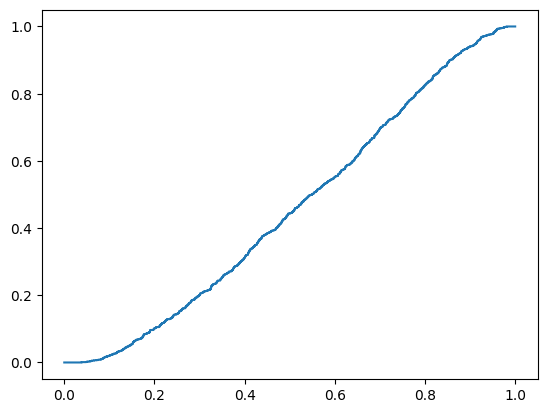

In [17]:
from sklearn.metrics import roc_curve, auc
nb_probs = nb_bow.predict_proba(X_test_bow)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test_bow, nb_probs)
roc_auc_nb = auc(fpr_nb, tpr_nb)


plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {roc_auc_nb:.2f})")